# Monte Carlo Simulation

### Initialization

In [104]:
#imports
import random
import math
import numpy as np
import matplotlib.pyplot as plt

#thickness of semi-infinite tissue (cm)
thickness = 10

#absorbtion and scattering coefficient (cm-1)
mua = 0.1
mus = 100.0

#Anisotropy Factor (unitless)
g = 0.91

#Refractive index of medium and surrounding
nout = 1.0
ntissue = 1.33

#Number of photons to be simulated
Nphotons = 1

#Photon survival parameters
epsilon = 0.0001
m = 10

#specular reflection
Rsp = ((nout - ntissue)**2) / ((nout + ntissue)**2)
Rs = Rsp*Nphotons

### Photon Definition and Functions

In [172]:
class Photon:
    def __init__(self):
        self.position = [0, 0, 0]
        
        #x, y, and z cosigns
        self.direction = [0, 0, 1]
        
        self.weight = 1
        
        #TODO maybe initialize Pathlength and Scoring Parameters
    
    
    #move photon a path lenth along direction vector
    def move(self, path_length):
        self.position[0] = self.position[0] + self.direction[0]*path_length
        self.position[1] = self.position[1] + self.direction[1]*path_length
        self.position[2] = self.position[2] + self.direction[2]*path_length
        
        self.weight -= 0.1
    
    
    def updateDirection(self):
        theta = np.arccos((1/(2*g))*(1+g**2-((1-g**2)/(1-g+2*g*random.random()))**2))
        omega = 2 * math.pi * random.random()
        
        if self.direction[2] > 0.999:
            self.direction[0] = math.sin(theta) * math.cos(omega)
            self.direction[1] = math.sin(theta) * math.cos(omega)
            self.direction[2] = math.sin(self.direction[2]) * math.cos(theta)
        
        else:
            new_mux = math.sin(theta)*(self.direction[0]*self.direction[2]*math.cos(omega)-self.direction[1]*math.sin(omega))/(math.sqrt(1-(self.direction[2]**2)))+self.direction[0]*math.cos(theta)
            new_muy = math.sin(theta)*(self.direction[1]*self.direction[2]*math.cos(omega)+self.direction[0]*math.sin(omega))/(math.sqrt(1-(self.direction[2]**2)))+self.direction[1]*math.cos(theta)
            new_muz = -1 * math.sin(theta)*math.cos(omega)*math.sqrt(1-(self.direction[2]**2))+self.direction[2]*math.cos(theta)
                                       
            self.position[0] = new_mux    
            self.position[1] = new_muy  
            self.position[2] = new_muz  
                                       
    
    def isAlive(self):
        if self.weight <= 0 or self.position[2] < 0 or self.position[2] > thickness:
            return False
        return True
        

In [173]:
def stepFromDistrobution(x):
    return (-1 * math.log(x)) / mus 

In [174]:
def plotPoints(x, y, z):
    ax = fig.add_subplot(projection='3d')
    ax.set_xlim(-1,1)
    ax.set_ylim(-1,1)
    #ax.set_zlim(0.5,0)
    ax.scatter(x,y,z, c='r',s=1)
    ax.plot(x,y,z, color='r')
    
    px = np.linspace(-1, 1, 10)
    py = np.linspace(-1, 1, 10)

    px, py = np.meshgrid(px, py)
    eq = 0 * px + 0 * py + 0
    ax.plot_surface(px, py, eq, alpha=0.2)

    plt.show()

### Main Simulation Loop

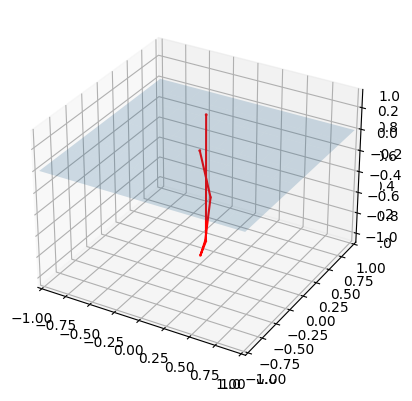

In [178]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')


for iteration in range(int(Nphotons)):
    photon = Photon()
    pos_vec = [[], [], []]
    
    while photon.isAlive():
        #save prev position and move to new position
        photon.move(path_length=stepFromDistrobution(random.random()))
        photon.updateDirection()
        
        
        #save positions for plotting
        pos_vec[0].append(photon.position[0])
        pos_vec[1].append(photon.position[1])
        pos_vec[2].append(-photon.position[2])
        #ax.scatter(photon.position[0], photon.position[1], -photon.position[2], c='red',s=1)
        #ax.plot([prev_position[0], photon.position[0]], [prev_position[1], photon.position[1]], [prev_position[2], photon.position[2]])

    plotPoints(pos_vec[0], pos_vec[1], pos_vec[2])
#plt.show()